## Titanic Survival Perdiction 

##### First Kaggle Assignment ####

1) Introduction

Import Libraries
Load data
Run Statistical summaries
Figure out missing value columns

2) Visualizations

Correlation with target variable

3) Missing values imputation

train data Missing columns- Embarked,Age,Cabin
test data Missing columns- Age and Fare


4) Feature Engineering

Calculate total family size
Get title from name
Find out which deck passenger belonged to
Dealing with Categorical Variables
Label encoding
Feature Scaling


5) Prediction

Split into training & test sets
Build the model
Feature importance
Predictions
Ensemble : Majority voting
6) Submission

In [9]:
import pandas as pd 
from google.colab import drive
drive.mount('/content/drive/')

train=pd.read_csv('/content/drive/My Drive/train.csv')
test=pd.read_csv('/content/drive/My Drive/test.csv')
gender=pd.read_csv('/content/drive/My Drive/gender_submission.csv')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:

# import numpy as np

# import types
# import pandas as pd



# train = pd.read_csv('C:\\Users\\risha\\Downloads\\titanic\\train.csv')
# train.head()



In [0]:

# test = pd.read_csv('C:\\Users\\risha\\Downloads\\titanic\\test.csv')

# test.head()



In [0]:
print("Number of Rows % columns in  train dataset", train.shape)
print("Number of Rows % columns in  test dataset", test.shape)


Number of Rows % columns in  train dataset (891, 12)
Number of Rows % columns in  test dataset (418, 11)


In [0]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
### Describe command helps me to take the decision regarding the imputation.
# After looking into the above description these are the infrences which i can conclude in first go:

# a.Passenger id : number incremented by 1 can be removed
# b.Survived: Target variable with values between zero and one
# c.Pclass :Ordinal Variable values lies between 1 and 3 
# d.Age :Has missing values so imputation needed over there ,Secondly maximum age is 80 which is fine but the smallest age is 0.42 which needs to be be verified
# e.SibSp: This variables provides information about number of siblings/Spouse,Minimum value is 0 and max is 6
# f.Parch: This variables tells about the number of Parent/Children aboard Values lie between 0 and 6
# g.Fare: Min fare i can see is zero which is not possible needs to be verified .Max fare is 512


In [0]:
# Describe doesn't provide information about categorical variable.Lets 

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
# Age and Cabin has null values .Furthermore Embarked has null value


In [0]:
# Show me seaborn skills :D

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1)
sns.set_context("talk")

In [0]:
# Missing Values 
missing_values=train.isnull().sum()
missing_values=missing_values[missing_values>0]

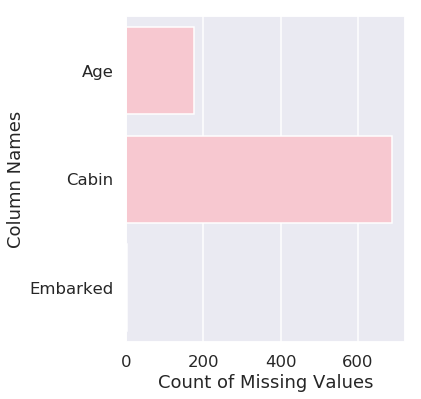

In [0]:
f, ax = plt.subplots(figsize=(5,6))
sns.axes_style("whitegrid")
ax.set_xlabel('Count of Missing Values')
ax.set_ylabel('Column Names')
sns.barplot(x=missing_values.values,y=missing_values.index,color='pink')


/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


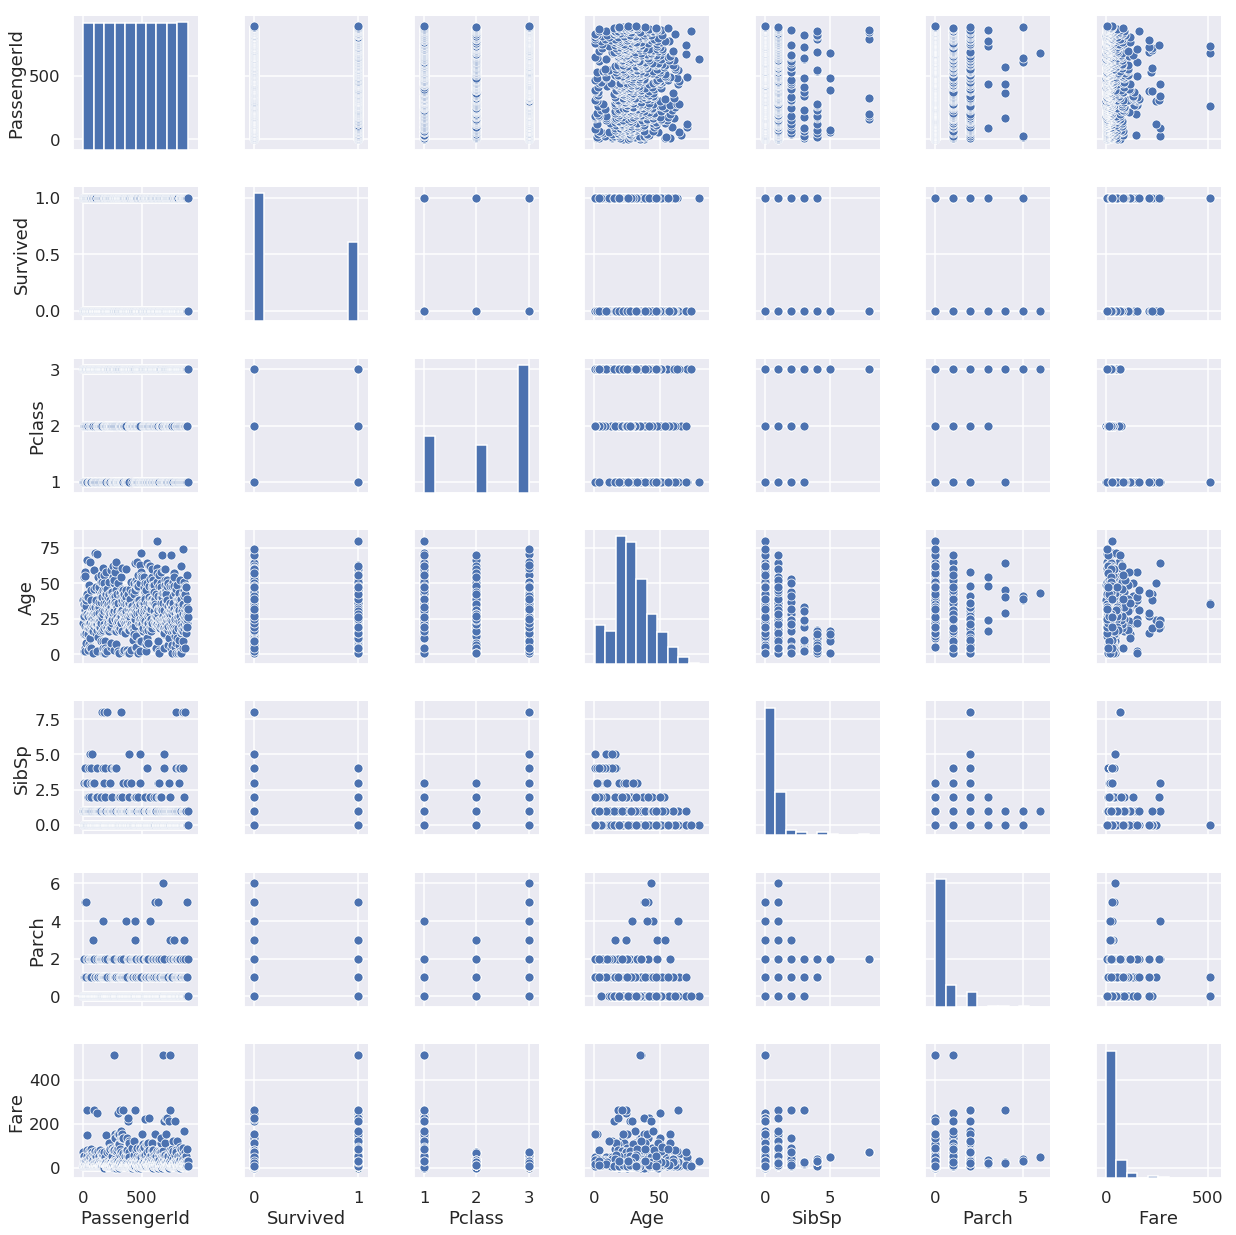

In [0]:
sns.pairplot(train)

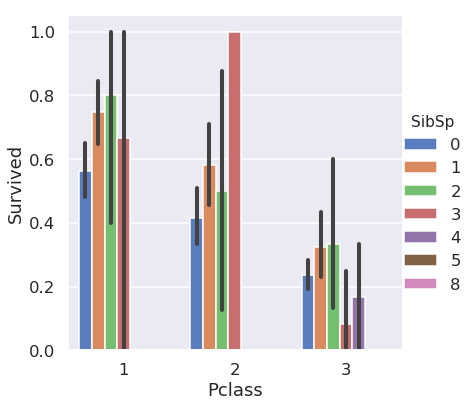

In [0]:
sns.catplot(x="Pclass", y="Survived", hue="SibSp", data=train,
                height=6, kind="bar", palette="muted")

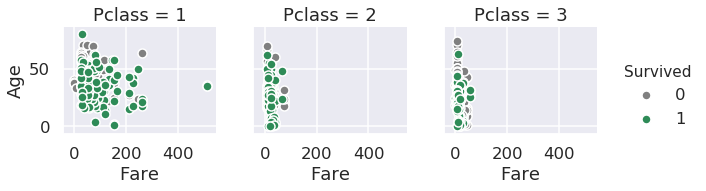

In [0]:
g = sns.FacetGrid(train, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"seagreen", 0:"gray"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

In [4]:
!pip install catboost


     |████████████████████████████████| 61.2MB 510kB/s 


In [5]:
# Feature Engineering and Models understanding 


# Supervised Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import feature_selection
import xgboost as xgb # XGBOOST
from xgboost.sklearn import XGBClassifier # XGBOOST
import hyperopt #CatBoost
from catboost import Pool, CatBoostClassifier #CatBoost
import lightgbm as lgb # Light GBM
import statsmodels.api as sm # Logistic Regression with StatModels

# Unsupervised Models
from sklearn.decomposition import PCA

# Evalaluation
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score

# Grid
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as st

# Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

# Esemble Voting
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score

# Stacking
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from matplotlib.colors import ListedColormap

# Warnings
import warnings
warnings.filterwarnings(action='ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

import time
import datetime
import platform
start = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
# Model submissions

In [0]:
Survived=train['Survived'].copy()

train_df=train.drop('Survived',axis=1)
df=pd.concat([train,test])
train_index=train.index
test_index=test.index
del train,test



In [0]:
# Creating New variables 

df['Family_Size']=df['SibSp']+df['Parch']+1


# Name Length

df['Name_len']=df['Name'].apply(lambda x:len(x))

# Is Alone?
df['IsAlone']=0

df.loc[df['Family_Size']==1,'IsAlone']=1

# Saluation based Variables

df['Title']=0


df['Title']=df['Name'].str.extract('([A-Za-z]+)\.')

df['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                    ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)


# Age
df.loc[(df.Age.isnull())&(df.Title=='Mr'),'Age']= df.Age[df.Title=="Mr"].mean()
df.loc[(df.Age.isnull())&(df.Title=='Mrs'),'Age']= df.Age[df.Title=="Mrs"].mean()
df.loc[(df.Age.isnull())&(df.Title=='Master'),'Age']= df.Age[df.Title=="Master"].mean()
df.loc[(df.Age.isnull())&(df.Title=='Miss'),'Age']= df.Age[df.Title=="Miss"].mean()
df.loc[(df.Age.isnull())&(df.Title=='Other'),'Age']= df.Age[df.Title=="Other"].mean()

df = df.drop('Name', axis=1)


# Fill NA
# Categoricals Variable
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode().iloc[0])

# Continuous Variable
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

## Assign Binary to Sex str
df['Sex'] = df['Sex'].map({'female': 1,
                           'male': 0}).astype(int)
# Title
df['Title'] = df['Title'].map( {'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Master':3, 'Other':4} )#.astype(int)
df['Title'] = df['Title'].fillna(df['Title'].mode().iloc[0])
df['Title'] = df['Title'].astype(int)

# Embarked
df['Embarked'] = df['Embarked'].map( {'Q': 0, 'S': 1, 'C': 2} ).astype(int)

# Get Rid of Ticket and Cabin Variable
df= df.drop(['Ticket', 'Cabin'], axis=1)

categorical_features = ["Pclass","Sex","IsAlone","Title", "Embarked"]






In [62]:
df.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Family_Size,Name_len,IsAlone,Title
0,22.0,1,7.2500,0,1,3,0,1,0.0,2,23,0,0
1,38.0,2,71.2833,0,2,1,1,1,1.0,2,51,0,1
2,26.0,1,7.9250,0,3,3,1,0,1.0,1,22,1,2
3,35.0,1,53.1000,0,4,1,1,1,1.0,2,44,0,1
4,35.0,1,8.0500,0,5,3,0,0,0.0,1,24,1,0
